# ENSEMBLES


In [1]:
import numpy as np
import pandas as pd

X_train = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/X_train_3", index_col=0)
X_test = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/X_test_3", index_col=0)

features_columns = X_train.columns

y_train = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/y_train", index_col=0)
y_test = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/y_test", index_col=0)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)



In [2]:
## Normalization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## Cálculo de pesos para las clases

In [3]:
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos por clase y creación de diccionario para uso en modelos
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

## Voting classification

In [4]:
# Logistic regrssion + random forest + svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

'''
Por defecto coge soft voting, si pueden todos los clasificadores.
En el caso del SVM tiene que realizar una validación cruzada ya que
no soporta el predict_proba()
'''

log_clf = LogisticRegression(random_state=42, class_weight="balanced", max_iter = 10000) 

rnd_clf = RandomForestClassifier(n_estimators=200, max_depth= 30, random_state=42,
                                 class_weight= 'balanced') 
svm_clf = SVC(kernel="linear", random_state=42, class_weight="balanced", C = 1, probability=True)

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [5]:
voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [7]:
y_pred = voting_clf.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.75      0.41       815
           1       0.89      0.50      0.64      3194

    accuracy                           0.56      4009
   macro avg       0.58      0.63      0.53      4009
weighted avg       0.77      0.56      0.60      4009



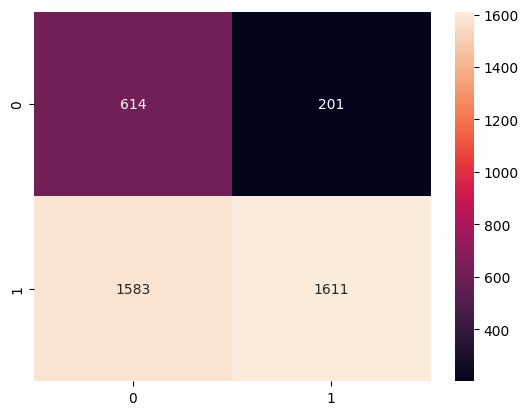

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [12]:
# Logistic regrssion + random forest + svm + xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost

'''
Por defecto coge soft voting, si pueden todos los clasificadores.
En el caso del SVM tiene que realizar una validación cruzada ya que
no soporta el predict_proba()
'''

log_clf = LogisticRegression(random_state=42, class_weight="balanced", max_iter = 10000) 

rnd_clf = RandomForestClassifier(n_estimators=200, max_depth= 30, random_state=42,
                                 class_weight= 'balanced') 
svm_clf = SVC(kernel="linear", random_state=42, class_weight="balanced", C = 1, probability=True)
xgb = xgboost.XGBClassifier(objective="binary:logistic", n_estimators=100,learning_rate = 0.1 , random_state=42)

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('xgb', xgb)]

voting2_clf = VotingClassifier(estimators=estimators, voting='hard')

In [13]:
voting2_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [14]:
y_pred2 = voting2_clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.28      0.75      0.41       815
           1       0.89      0.50      0.64      3194

    accuracy                           0.56      4009
   macro avg       0.58      0.63      0.53      4009
weighted avg       0.77      0.56      0.60      4009



In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 613,  202],
       [1577, 1617]], dtype=int64)

## RandomForest


In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200,
                                 max_depth= 30,
                                 random_state=42,
                                 class_weight= 'balanced')
rnd_clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rnd_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

0.745323023197805

In [11]:
features_importance = pd.DataFrame(rnd_clf.feature_importances_, columns = ["features_importance"], index= features_columns) 
features_importance["features_importance"].sort_values(ascending=False).head(20)

Date received_day_of_month           0.184719
Date sent to company_day_of_month    0.183322
Date received_day_week               0.103597
Date sent to company_day_week        0.100745
subproduct_class0_enc                0.095081
divisions_South Atlantic             0.016708
divisions_West South Central         0.013984
divisions_Pacific                    0.013327
regions_South                        0.013311
regions_West                         0.012726
divisions_Middle Atlantic            0.011713
regions_Northeast                    0.011335
Date received_weekend                0.011291
divisions_East North Central         0.011265
Company_type_Lender                  0.011043
regions_Midwest                      0.010773
divisions_Mountain                   0.010503
embedding_20                         0.009817
embedding_23                         0.009801
Date sent to company_weekend         0.009627
Name: features_importance, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

model_RF_cv = RandomForestClassifier(n_estimators=300,
                                 max_depth= 30,
                                 random_state=42,
                                 class_weight= 'balanced')
scores = cross_val_score(model_RF_cv, X_train, y_train, cv=5)
scores

## AdaBoost

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

estimator = DecisionTreeClassifier(max_depth=30, class_weight=class_weights_dict)

ada_clf = AdaBoostClassifier(estimator = estimator,
                             n_estimators=500,
                             learning_rate=1,
                             random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       815
           1       0.82      0.81      0.81      3194

    accuracy                           0.70      4009
   macro avg       0.55      0.55      0.55      4009
weighted avg       0.71      0.70      0.71      4009



In [97]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 226,  589],
       [ 595, 2599]], dtype=int64)

## Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier(n_estimators=100, max_depth= 20,
             random_state=42, learning_rate = 0.5)

In [54]:
model_GB.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.5
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,20
,min_impurity_decrease,0.0
,init,None


In [55]:
model_GB_predictions = model_GB.predict(X_test)
print(classification_report(y_test, model_GB_predictions))

              precision    recall  f1-score   support

           0       0.32      0.19      0.24       815
           1       0.81      0.90      0.85      3194

    accuracy                           0.75      4009
   macro avg       0.57      0.54      0.55      4009
weighted avg       0.71      0.75      0.73      4009



## XGboost

In [2]:
import xgboost
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [18]:
xgb_clas = xgboost.XGBClassifier(objective="binary:logistic", n_estimators=100, 
                                 learning_rate = 5 , random_state=42)

xgb_clas.fit(X_train, y_train)
y_pred = xgb_clas.predict(X_test)
accuracy_score(y_test, y_pred)


0.6575205786979297

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.40      0.32       815
           1       0.82      0.72      0.77      3194

    accuracy                           0.66      4009
   macro avg       0.55      0.56      0.55      4009
weighted avg       0.71      0.66      0.68      4009



In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[  43,  772],
       [  21, 3173]], dtype=int64)

### PRUEBA con SMOTE y ADASYN

In [14]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)


In [15]:
# Random FOrest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200,
                                 max_depth= 30,
                                 random_state=42,
                                 class_weight= 'balanced')
rnd_clf.fit(X_resampled, y_resampled)

,n_estimators,200
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred_rf = rnd_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.32      0.25      0.28       815
           1       0.82      0.86      0.84      3194

    accuracy                           0.74      4009
   macro avg       0.57      0.55      0.56      4009
weighted avg       0.72      0.74      0.73      4009



In [ ]:
# XG Boost

xgb_clas = xgboost.XGBClassifier(objective="binary:logistic", n_estimators=100, 
                                 learning_rate = 0.3 , random_state=42)

xgb_clas.fit(X_resampled, y_resampled)
y_pred = xgb_clas.predict(X_test)
accuracy_score(y_test, y_pred)

0.7712646545273135

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.17      0.23       815
           1       0.81      0.93      0.87      3194

    accuracy                           0.77      4009
   macro avg       0.59      0.55      0.55      4009
weighted avg       0.72      0.77      0.74      4009



In [61]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = ADASYN(random_state=42).fit_resample(X_train, y_train)


In [62]:
xgb_clas = xgboost.XGBClassifier(objective="binary:logistic", n_estimators=100, 
                                 learning_rate = 0.1 , random_state=42)

xgb_clas.fit(X_resampled, y_resampled)
y_pred = xgb_clas.predict(X_test)
accuracy_score(y_test, y_pred)

0.7757545522574208

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.18      0.25       815
           1       0.82      0.93      0.87      3194

    accuracy                           0.78      4009
   macro avg       0.60      0.56      0.56      4009
weighted avg       0.73      0.78      0.74      4009



## Stacking


In [6]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth= 30, random_state=42,class_weight= 'balanced')),
        ('svc', SVC(probability=True, random_state=42)),
        ('xgb', xgboost.XGBClassifier(objective="binary:logistic", n_estimators=100,learning_rate = 0.1 , random_state=42)
)
        
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
)

In [7]:
stacking_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,final_estimator,RandomForestC...ndom_state=43)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [10]:
from sklearn.metrics import classification_report

y_pred = stacking_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.10      0.16       815
           1       0.81      0.96      0.88      3194

    accuracy                           0.79      4009
   macro avg       0.61      0.53      0.52      4009
weighted avg       0.73      0.79      0.73      4009

